In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import nltk

In [3]:
df=pd.read_csv("Training.csv")
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
df.shape

(4920, 134)

In [5]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [6]:
df['prognosis'].isnull().sum()

0

In [7]:
nan_count = df.isnull().sum()
print(nan_count[nan_count > 0])

Unnamed: 133    4920
dtype: int64


In [8]:
df.drop(columns=['Unnamed: 133'],inplace=True)

In [9]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [10]:
nan_count = df.isnull().sum()
print(nan_count[nan_count > 0])

Series([], dtype: int64)


In [11]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'itching': [1 0]
Unique values in column 'skin_rash': [1 0]
Unique values in column 'nodal_skin_eruptions': [1 0]
Unique values in column 'continuous_sneezing': [0 1]
Unique values in column 'shivering': [0 1]
Unique values in column 'chills': [0 1]
Unique values in column 'joint_pain': [0 1]
Unique values in column 'stomach_pain': [0 1]
Unique values in column 'acidity': [0 1]
Unique values in column 'ulcers_on_tongue': [0 1]
Unique values in column 'muscle_wasting': [0 1]
Unique values in column 'vomiting': [0 1]
Unique values in column 'burning_micturition': [0 1]
Unique values in column 'spotting_ urination': [0 1]
Unique values in column 'fatigue': [0 1]
Unique values in column 'weight_gain': [0 1]
Unique values in column 'anxiety': [0 1]
Unique values in column 'cold_hands_and_feets': [0 1]
Unique values in column 'mood_swings': [0 1]
Unique values in column 'weight_loss': [0 1]
Unique values in column 'restlessness': [0 1]
Unique values in column 'letharg

In [12]:

test_df = pd.read_csv('Testing.csv')
print("Training set NaN values:\n", df.isnull().sum()[df.isnull().sum() > 0])
print("Testing set NaN values:\n", test_df.isnull().sum()[test_df.isnull().sum() > 0])


Training set NaN values:
 Series([], dtype: int64)
Testing set NaN values:
 Series([], dtype: int64)


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the datasets

test_df = pd.read_csv('Testing.csv')

# Split into features and target
X_train = df.drop('prognosis', axis=1)  # Features (symptoms)
y_train = df['prognosis']               # Target variable (disease label)

X_test = test_df.drop('prognosis', axis=1)  # Features (symptoms)
y_test = test_df['prognosis']               # Target variable (disease label)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "k-Nearest Neighbors": KNeighborsClassifier()
}

# Function to evaluate a model with cross-validation and test data
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    
    return cv_scores, test_accuracy, classification_report(y_test, y_pred)

# Dictionary to store the results
results = {}

# Evaluate each model
for name, model in models.items():
    cv_scores, test_accuracy, report = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        "Cross-Validation Scores": cv_scores,
        "Mean CV Accuracy": np.mean(cv_scores),
        "Test Accuracy": test_accuracy,
        "Classification Report": report
    }

# Print the results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Cross-Validation Scores: {result['Cross-Validation Scores']}")
    print(f"Mean CV Accuracy: {result['Mean CV Accuracy']}")
    print(f"Test Accuracy: {result['Test Accuracy']}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("-" * 60)


Model: Logistic Regression
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0
Test Accuracy: 1.0
Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      

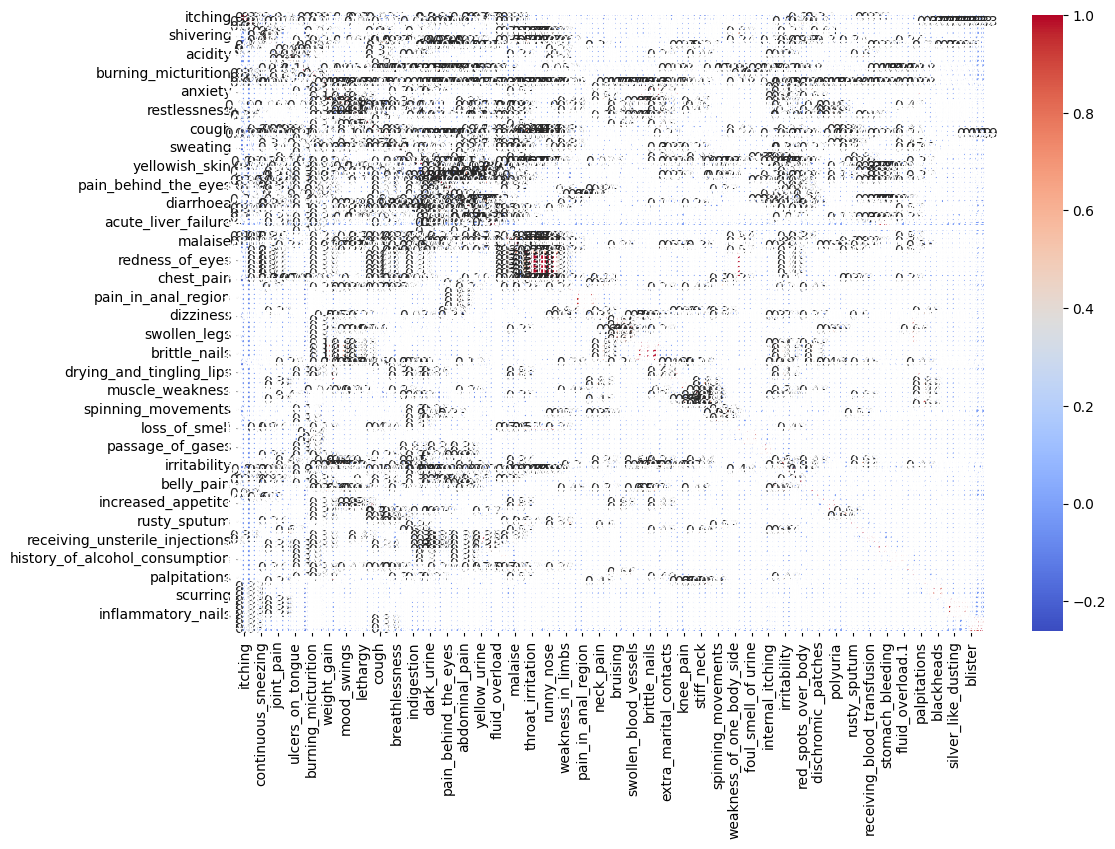

In [14]:
import matplotlib.pyplot as plt
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(X_train[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()



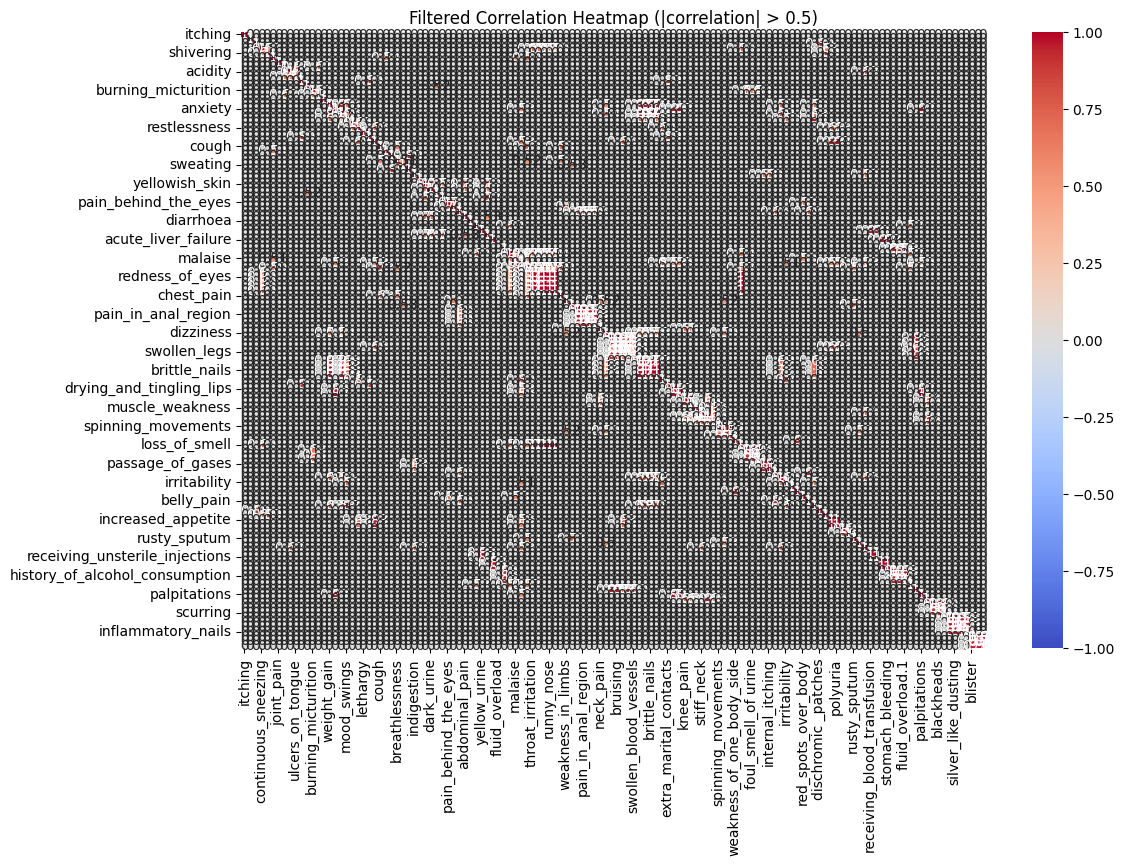

In [15]:
# Select only numeric columns for correlation analysis
numeric_cols = X_train.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
corr_matrix = X_train[numeric_cols].corr()

# Filter correlations
threshold = 0.5
strong_corrs = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]
strong_corrs = strong_corrs.fillna(0)

# Plot the filtered correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(strong_corrs, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Filtered Correlation Heatmap (|correlation| > 0.5)')
plt.show()

In [16]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel

# Feature selection and dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', pca),
    ('log_reg', log_reg)
])

# Cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f'Cross-Validation Accuracy: {cv_scores.mean()}')

# Train and evaluate on the test set
pipeline.fit(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

Cross-Validation Accuracy: 1.0
Test Accuracy: 0.9761904761904762


In [17]:
# Try even stronger regularization with L2 penalty
log_reg_l2 = LogisticRegression(penalty='l2', C=0.001, solver='liblinear')
cv_scores_l2 = cross_val_score(log_reg_l2, X_train, y_train, cv=10)
print(f'L2 Regularization - Cross-Validation Accuracy: {cv_scores_l2.mean()}')

log_reg_l2.fit(X_train, y_train)
test_accuracy_l2 = log_reg_l2.score(X_test, y_test)
print(f'L2 Regularization - Test Accuracy: {test_accuracy_l2}')

# Try L1 penalty with a different solver
log_reg_l1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
cv_scores_l1 = cross_val_score(log_reg_l1, X_train, y_train, cv=10)
print(f'L1 Regularization - Cross-Validation Accuracy: {cv_scores_l1.mean()}')

log_reg_l1.fit(X_train, y_train)
test_accuracy_l1 = log_reg_l1.score(X_test, y_test)
print(f'L1 Regularization - Test Accuracy: {test_accuracy_l1}')


L2 Regularization - Cross-Validation Accuracy: 1.0
L2 Regularization - Test Accuracy: 0.9761904761904762
L1 Regularization - Cross-Validation Accuracy: 0.9983739837398374
L1 Regularization - Test Accuracy: 0.9761904761904762


muscle_pain: 0.019438637528133185
itching: 0.01601376891687625
altered_sensorium: 0.01600110703547539
dark_urine: 0.01581126149442194
high_fever: 0.015622896586447145
mild_fever: 0.015099701842873825
family_history: 0.01478615534702544
nausea: 0.014670174712480456
yellowing_of_eyes: 0.014079269147568171
sweating: 0.013822647375271528
unsteadiness: 0.01358911176117007
chest_pain: 0.013118783920090964
fatigue: 0.012688176241691804
abdominal_pain: 0.012669934711763801
joint_pain: 0.01262928038669601
diarrhoea: 0.012459439069905202
lack_of_concentration: 0.011938186430757173
red_spots_over_body: 0.011680919387244727
loss_of_appetite: 0.011402099279183424
vomiting: 0.011395973381016356
chills: 0.011360780186332726
breathlessness: 0.01118027848019236
bladder_discomfort: 0.011059500994236452
rusty_sputum: 0.01096573439495215
headache: 0.01085912597539182
dischromic _patches: 0.010537787541384498
back_pain: 0.010074114533326598
cough: 0.010056177922035035
receiving_unsterile_injections: 0.0099

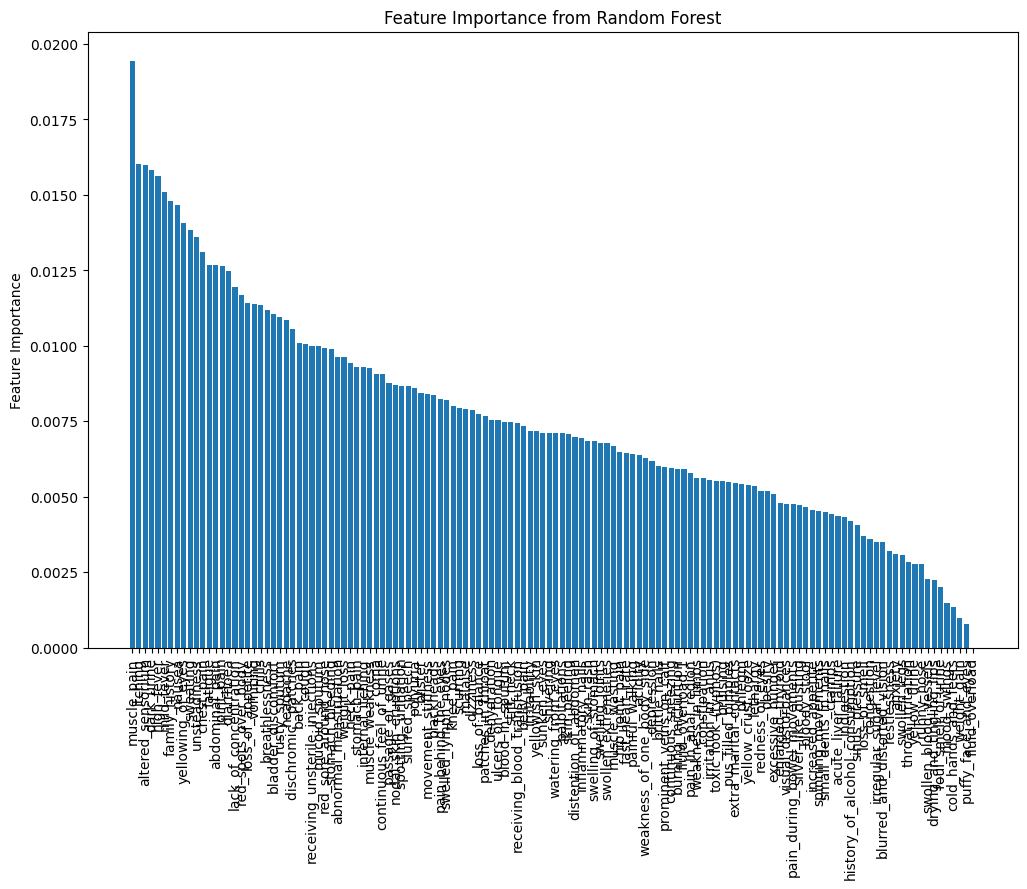

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Check feature importance using a Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]
for i in range(X_train.shape[1]):
    print(f'{X_train.columns[indices[i]]}: {feature_importances[indices[i]]}')

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.ylabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [25]:
from sklearn.feature_selection import RFE

# Define the model
log_reg = LogisticRegression(penalty='l2', C=0.001, solver='liblinear')

# Perform RFE
rfe = RFE(estimator=log_reg, n_features_to_select=20)  # Adjust number of features to select
rfe.fit(X_train, y_train)

# Select the important features
X_train_rfe = X_train.loc[:, rfe.support_]
X_test_rfe = X_test.loc[:, rfe.support_]
important_features_list = X_train.columns[rfe.support_].tolist()
# Train and evaluate the model with selected features
cv_scores = cross_val_score(log_reg, X_train_rfe, y_train, cv=10)
print(f'Cross-Validation Accuracy: {cv_scores.mean()}')

log_reg.fit(X_train_rfe, y_train)
test_accuracy = log_reg.score(X_test_rfe, y_test)
print(f'Test Accuracy: {test_accuracy}')

joblib.dump(log_reg, 'logistic_regression_model.pkl')
joblib.dump(important_features_list, 'important_features.pkl')


Cross-Validation Accuracy: 0.8721544715447154
Test Accuracy: 0.8809523809523809


['important_features.pkl']

In [42]:
len(X_test.columns)

132